# Import & Analysing the Data

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth',100)
import requests

In [ ]:
data = pd.read_csv('iPhone_4s_reviews_data.csv')

In [ ]:
data.head()

Reviews
0                                                                                                  Bad
1                                                                              Charger not working...😫
2                                                                     one of the speaker doesn't works
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...
4  awesome phone with really great look and performance....you will love it if you will use it...re...

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19371 entries, 0 to 19370
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  19369 non-null  object
dtypes: object(1)
memory usage: 151.5+ KB


In [ ]:
data.shape

(19371, 1)

In [ ]:
data.isnull().sum()

Reviews    2
dtype: int64

In [ ]:
data.dropna()

Reviews
0                                                                                                      Bad
1                                                                                  Charger not working...😫
2                                                                         one of the speaker doesn't works
3      The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...
4      awesome phone with really great look and performance....you will love it if you will use it...re...
...                                                                                                    ...
19366                                          no excitement for iphone users! only  \n2x CPU \n2x Storage
19367                                                                                        Thumbs Up! :)
19368                                                                             Too early to say Hello!!
19369                                  Yes, the same great design! I love it :) \nSpec-wize - thumbs down.
19370                                                                       Hi \nwhat's new in this phone?

[19369 rows x 1 columns]

In [ ]:
data.shape

(19371, 1)

### Word Count

In [ ]:
data['word_counts'] = data['Reviews'].apply(lambda x: len(str(x).split()))
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  
0            1  
1            3  
2            6  
3           52  
4           45

### Characters Count

In [ ]:
data['char_counts'] = data['Reviews'].apply(lambda x: len(str(x)))
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  
0            1            3  
1            3           23  
2            6           32  
3           52          298  
4           45          266

### Stopword Count

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
data['stopword_count'] = data['Reviews'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop_words]))
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  stopword_count  
0            1            3               0  
1            3           23               1  
2            6           32               3  
3           52          298              23  
4           45          266              22

#  Cleaning  or Text Preprocessing

### Converting all data in lower case

In [ ]:
data['Lowercase'] = data['Reviews'].apply(lambda x: " ".join(word.lower() for word in str(x).split()))
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  stopword_count  \
0            1            3               0   
1            3           23               1   
2            6           32               3   
3           52          298              23   
4           45          266              22   

                                                                                             Lowercase  
0                                                                                                  bad  
1                                                                              charger not working...😫  
2                                                                     one of the speaker doesn't works  
3  the piece i got is worst piece and it is refurbished.. lot of features not working properly.. i ...  
4  awesome phone with really great look and performance....you will love it if you will use it...re...

### Define a function to clean the text

In [ ]:
import re 
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z0-9_]+', ' ', str(text))
    text = re.sub('#',' ',str(text))
    text = re.sub('https?:/\/\[A-Za-z0-9\.\/]+',' ',str(text))
    return text

# Cleaning the text in the review column
data['Punctuation'] = data['Lowercase'].apply(clean)
data.head(50)

Reviews  \
0                                                                                                   Bad   
1                                                                               Charger not working...😫   
2                                                                      one of the speaker doesn't works   
3   The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4   awesome phone with really great look and performance....you will love it if you will use it...re...   
5   I bought an apple 4s 16gb, but this product is full dusted in USB , headphone, speaker ports...T...   
6   You also can work in 2021 but just need small jail break otherwise fantastic phone loved it.. yo...   
7          it have a very very good camera quality it has siri it is good product from apple inc try it   
8   I have been using this phone for more than a year and although I am not a big fan of apple produ...   
9   Excellent product by Apple and no model can beat this beast, Including other models from Apple t...   
10  I bought it in Aug and within a month it has stopped working. This is the worst product I have e...   
11                                                                                              Awesome   
12                                                                                          I loved it👍   
13  very good phone and  i am loving it... its the best..better than any phone of samsung...its reco...   
14  I liked 4s better than 5/5s. I had all 3 and preferred 4s because it's compact and has everythin...   
15  If you're looking for high speed 4G/LTE feature then 4S doesn't have it being a 30+K price phone...   
16  If to say in a nutshell, product is MORE THAN EXCELLENT.My experience say that many global brand...   
17  Ordered this product on 8th of July and I received it on 9th. Here are the pros and cons-Pros:1....   
18  Pros : touch is great, phone response time is superb due to underlying OS.IPhone is much secure ...   
19  Buy, if your Budget is below 13K.I am using the IPhone 4s for more than 10 months now, & i feel ...   
20  This phone has problems with the signal reception.Even when other phones are showing good signal...   
21  It was a wonderful feeling to have my first IPhone. To inform everybody I have used Antroid and ...   
22  Very good phone. iOS does not upgrade more than 9. But really nice for the time when it was rele...   
23  Awesome phone at compare android and windows, only battery backup is low , but battery is good c...   
24  Can be A very good gifts to older peoples.... because They don't need much memory space..... Pho...   
25  Iphone 4S is good but ROM size is too low. why means they giving 8 GB of memory, in that 2.5 GB ...   
26  I  got it  before  the  estimated date. It  was  so  quick.  The  phone  is  original. .I  check...   
27  1 of the speaker is not working, maybe its a refurbished phone. Its alright for the pricing and ...   
28  It's been 1.5 years now that I'm using this phone. It's nice. Got at a deal price here. Awesome ...   
29  I bought an iPhone 4s White, 8GB  through amazon On 31/12/2014 after I got the phone two times w...   
30  I am regular customer on Amazon, I purchased a iPhone 4s 8GB after 15 days I came to know that o...   
31                                                                 Nice Phone .Using for last 4 years .   
32  One and a half year and having issues with voice reception although it is used by my mother so n...   
33  i purchase these for my comfort and other companies give smartphone on big display so i can't ta...   
34                                                                                                   Ok   
35                                                      I reviewed after 4 years usage. look like new..   
36  Wow the phone is juz sturdy metal loaded with ios 8.3 with update ready to 8.4, overall performa...   
37  somehow I prefer my Lumia 

### Remove Stopwords

In [ ]:
data['Stopwords'] = data['Punctuation'].apply(lambda x: " ".join(word for word in str(x).split() if word not in stop_words))

In [ ]:
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  stopword_count  \
0            1            3               0   
1            3           23               1   
2            6           32               3   
3           52          298              23   
4           45          266              22   

                                                                                             Lowercase  \
0                                                                                                  bad   
1                                                                              charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  the piece i got is worst piece and it is refurbished.. lot of features not working properly.. i ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

                                                                                           Punctuation  \
0                                                                                                  bad   
1                                                                                 charger not working    
2                                                                     one of the speaker doesn t works   
3  the piece i got is worst piece and it is refurbished lot of features not working properly i didn...   
4  awesome phone with really great look and performance you will love it if you will use it recieve...   

                                                                                             Stopwords  
0                                                                                                  bad  
1                                                                                      charger working  
2                                                                                    one speaker works  
3  piece got worst piece refurbished lot features working properly returned phone return process lo...  
4  awesome phone really great look performance love use recieved order timely amazon got complete b...

### Lemmatization

In [ ]:
# Import Textblob
from textblob import Word

In [ ]:
data['Lammatized'] = data['Stopwords'].apply(lambda x: " ".join(Word(word).lemmatize() for word in str(x).split()))
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  stopword_count  \
0            1            3               0   
1            3           23               1   
2            6           32               3   
3           52          298              23   
4           45          266              22   

                                                                                             Lowercase  \
0                                                                                                  bad   
1                                                                              charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  the piece i got is worst piece and it is refurbished.. lot of features not working properly.. i ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

                                                                                           Punctuation  \
0                                                                                                  bad   
1                                                                                 charger not working    
2                                                                     one of the speaker doesn t works   
3  the piece i got is worst piece and it is refurbished lot of features not working properly i didn...   
4  awesome phone with really great look and performance you will love it if you will use it recieve...   

                                                                                             Stopwords  \
0                                                                                                  bad   
1                                                                                      charger working   
2                                                                                    one speaker works   
3  piece got worst piece refurbished lot features working properly returned phone return process lo...   
4  awesome phone really great look performance love use recieved order timely amazon got complete b...   

                                                                                            Lammatized  
0                                                                                                  bad  
1                                                                                      charger working  
2                                                                                     one speaker work  
3  piece got worst piece refurbished lot feature working properly returned phone return process lon...  
4  awesome phone really great look performance love use recieved order timely amazon got complete b...

### Sentiment Analysis

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    if sentiment_polarity<0:
        sentiment_label = "Negative"
    elif sentiment_polarity>0:
        sentiment_label = "Positive"
    else:
        sentiment_label = "Neutral"
        
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [ ]:
# Check function work or not
chk = data['Lammatized'].iloc[0]

In [ ]:
get_sentiment(chk)

{'polarity': -0.6999999999999998,
 'subjectivity': 0.6666666666666666,
 'sentiment': 'Negative'}

In [ ]:
data['Sentiment_Result'] = data['Lammatized'].apply(get_sentiment)
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  stopword_count  \
0            1            3               0   
1            3           23               1   
2            6           32               3   
3           52          298              23   
4           45          266              22   

                                                                                             Lowercase  \
0                                                                                                  bad   
1                                                                              charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  the piece i got is worst piece and it is refurbished.. lot of features not working properly.. i ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

                                                                                           Punctuation  \
0                                                                                                  bad   
1                                                                                 charger not working    
2                                                                     one of the speaker doesn t works   
3  the piece i got is worst piece and it is refurbished lot of features not working properly i didn...   
4  awesome phone with really great look and performance you will love it if you will use it recieve...   

                                                                                             Stopwords  \
0                                                                                                  bad   
1                                                                                      charger working   
2                                                                                    one speaker works   
3  piece got worst piece refurbished lot features working properly returned phone return process lo...   
4  awesome phone really great look performance love use recieved order timely amazon got complete b...   

                                                                                            Lammatized  \
0                                                                                                  bad   
1                                                                                      charger working   
2                                                                                     one speaker work   
3  piece got worst piece refurbished lot feature working properly returned phone return process lon...   
4  awesome phone really great look performance love use recieved order timely amazon got complete b...   

                                                                                  Sentiment_Result  
0   {'polarity': -0.6999999999999998, 'subjectivity': 0.6666666666666666, 'sentiment': 'Negative'}  
1                                   {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}  
2                                   {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}  
3  {'polarity': -0.30999999999999994, 'subjectivity': 0.6777777777777778, 'sentiment': 'Negative'}  
4                                {'polarity': 0.58, 'subjectivity': 0.75, 'sentiment': 'Positive'}

In [ ]:
data['Sentiment_Result']

0         {'polarity': -0.6999999999999998, 'subjectivity': 0.6666666666666666, 'sentiment': 'Negative'}
1                                         {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
2                                         {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
3        {'polarity': -0.30999999999999994, 'subjectivity': 0.6777777777777778, 'sentiment': 'Negative'}
4                                      {'polarity': 0.58, 'subjectivity': 0.75, 'sentiment': 'Positive'}
                                                      ...                                               
19366                                     {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
19367                                     {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
19368                                    {'polarity': 0.1, 'subjectivity': 0.3, 'sentiment': 'Positive'}
19369                                 {'polarity': 0.65

In [ ]:
# Split the Sentiment_Result column in three different column
pd.json_normalize(data['Sentiment_Result'])

polarity  subjectivity sentiment
0     -0.700000      0.666667  Negative
1      0.000000      0.000000   Neutral
2      0.000000      0.000000   Neutral
3     -0.310000      0.677778  Negative
4      0.580000      0.750000  Positive
...         ...           ...       ...
19366  0.000000      0.000000   Neutral
19367  0.000000      0.000000   Neutral
19368  0.100000      0.300000  Positive
19369  0.650000      0.675000  Positive
19370  0.136364      0.454545  Positive

[19371 rows x 3 columns]

In [ ]:
# Join these column to our dataset
data = data.join(pd.json_normalize(data['Sentiment_Result']))
data.head()

Reviews  \
0                                                                                                  Bad   
1                                                                              Charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  The piece i got is Worst piece and it is refurbished.. lot of features not working properly.. I ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

   word_counts  char_counts  stopword_count  \
0            1            3               0   
1            3           23               1   
2            6           32               3   
3           52          298              23   
4           45          266              22   

                                                                                             Lowercase  \
0                                                                                                  bad   
1                                                                              charger not working...😫   
2                                                                     one of the speaker doesn't works   
3  the piece i got is worst piece and it is refurbished.. lot of features not working properly.. i ...   
4  awesome phone with really great look and performance....you will love it if you will use it...re...   

                                                                                           Punctuation  \
0                                                                                                  bad   
1                                                                                 charger not working    
2                                                                     one of the speaker doesn t works   
3  the piece i got is worst piece and it is refurbished lot of features not working properly i didn...   
4  awesome phone with really great look and performance you will love it if you will use it recieve...   

                                                                                             Stopwords  \
0                                                                                                  bad   
1                                                                                      charger working   
2                                                                                    one speaker works   
3  piece got worst piece refurbished lot features working properly returned phone return process lo...   
4  awesome phone really great look performance love use recieved order timely amazon got complete b...   

                                                                                            Lammatized  \
0                                                                                                  bad   
1                                                                                      charger working   
2                                                                                     one speaker work   
3  piece got worst piece refurbished lot feature working properly returned phone return process lon...   
4  awesome phone really great look performance love use recieved order timely amazon got complete b...   

                                                                                  Sentiment_Result  \
0   {'polarity': -0.6999999999999998, 'subjectivity': 0.6666666666666666, 'sentiment': 'Negative'}   
1                                   {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}   
2                                   {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}   
3  {'polarity': -0.30999999999999994, 'subjectivity': 0.6777777777777778, 'sentiment': 'Negative'}   
4                                {'polarity': 0.58, 'subjectivity': 0.75, 'sentiment': 'Positive'}   

   polarity  s

In [ ]:
data['sentiment'].value_counts()

Positive    12340
Neutral      4651
Negative     2380
Name: sentiment, dtype: int64

# EDA

In [ ]:
# Import required liabraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline
from PIL import Image

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

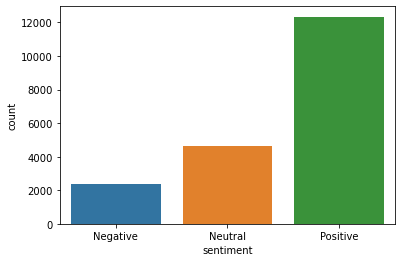

In [ ]:
sns.countplot(data['sentiment'])

### Check percentage of every sentiment

In [ ]:
positive = data[data['sentiment']=='Positive']['Lammatized']
print(str(positive.shape[0]/(data.shape[0])*100)+ "% of Positive Review")
pos = positive.shape[0]/(data.shape[0])*100

neutral = data[data['sentiment']=='Neutral']['Lammatized']
print(str(neutral.shape[0]/(data.shape[0])*100)+ "% of Neutral Review")
neu = neutral.shape[0]/(data.shape[0])*100

negative = data[data['sentiment']=='Negative']['Lammatized']
print(str(negative.shape[0]/(data.shape[0])*100)+ "% of Negative Review")
neg = negative.shape[0]/(data.shape[0])*100

63.70347426565485% of Positive Review
24.010118217954673% of Neutral Review
12.286407516390481% of Negative Review


In [ ]:
positive

4        awesome phone really great look performance love use recieved order timely amazon got complete b...
6        also work 2021 need small jail break otherwise fantastic phone loved still loved hv ordered 2013...
7                                                        good camera quality siri good product apple inc try
8        using phone year although big fan apple product except ipod say pretty decent phone pro 1 look b...
9        excellent product apple model beat beast including model apple till lag much user friendly even ...
                                                        ...                                                 
19360                                                                          come apple original idea gone
19364                                          still complete detail spec since announce tomorrow 10 04 2011
19368                                                                                        early say hello
19369              

In [ ]:
negative

0                                                                                                        bad
3        piece got worst piece refurbished lot feature working properly returned phone return process lon...
5        bought apple 4 16gb product full dusted usb headphone speaker port phone look like already used ...
10                                  bought aug within month stopped working worst product ever bought amazon
32       one half year issue voice reception although used mother heavy form usage still issue reception ...
                                                        ...                                                 
19355                           much different iphone 4 tim cook hard time presenting revolutionary tomorrow
19356                                                                                boring spec time change
19361                           apart ios5 nothing changed bad improvement least camera screen size improved
19362      iphones 

In [ ]:
neutral

1                                                                                charger working
2                                                                               one speaker work
63                                                                                         thank
66       sim card registered iphone 4 brought amazon phone requires unlock something please help
93                                                                                          foff
                                                  ...                                           
19353                                      hmmm design big internal storage screen size know say
19357                                                                                     want 5
19365                                                                                      thumb
19366                                                   excitement iphone user 2x cpu 2x storage
19367                         

### Piechart

(-1.111309279378153,
 1.1102379766828436,
 -1.1979548015421515,
 1.1189114574755767)

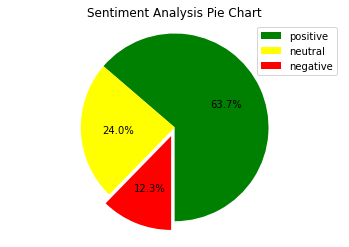

In [ ]:
explode = (0,0,0.1)
labels = 'positive','neutral','negative'
sizes = [pos,neu,neg]
colors = ['green','yellow','red']

plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=-90)
plt.legend(labels)
plt.title("Sentiment Analysis Pie Chart")
plt.axis('equal')

### Tokenization

In [ ]:
for line in positive:
    print(line)

awesome phone really great look performance love use recieved order timely amazon got complete bill contacted custmer care mail scanned copy quite satisfied
also work 2021 need small jail break otherwise fantastic phone loved still loved hv ordered 2013 daughter use phone
good camera quality siri good product apple inc try
using phone year although big fan apple product except ipod say pretty decent phone pro 1 look brand name2 simplicity great someone like messing different setting want use phone 3 apps one place iphones blow android phone market apps work great optimized work iphone every app promise work pretty much flawlessly4 speed smoothness phone still run faster smoother newer phone galaxy s3 nexus 4 con 1 battery life although people say provides decent battery life never case couple hour casual browsing 3g drain battery completely battery life decent wifi without internet though2 indoor camera quality great3 16 gb memory memory card support apps 100 mb size game 1 gb size pre

In [ ]:
for line in positive:
    for token in line.split():
        print(token)

awesome
phone
really
great
look
performance
love
use
recieved
order
timely
amazon
got
complete
bill
contacted
custmer
care
mail
scanned
copy
quite
satisfied
also
work
2021
need
small
jail
break
otherwise
fantastic
phone
loved
still
loved
hv
ordered
2013
daughter
use
phone
good
camera
quality
siri
good
product
apple
inc
try
using
phone
year
although
big
fan
apple
product
except
ipod
say
pretty
decent
phone
pro
1
look
brand
name2
simplicity
great
someone
like
messing
different
setting
want
use
phone
3
apps
one
place
iphones
blow
android
phone
market
apps
work
great
optimized
work
iphone
every
app
promise
work
pretty
much
flawlessly4
speed
smoothness
phone
still
run
faster
smoother
newer
phone
galaxy
s3
nexus
4
con
1
battery
life
although
people
say
provides
decent
battery
life
never
case
couple
hour
casual
browsing
3g
drain
battery
completely
battery
life
decent
wifi
without
internet
though2
indoor
camera
quality
great3
16
gb
memory
memory
card
support
apps
100
mb
size
game
1
gb
size
pre

In [ ]:
positive_token = [token for line in positive for token in line.split()]

In [ ]:
negative_token = [token for line in negative for token in line.split()]

In [ ]:
neutral_token = [token for line in neutral for token in line.split()]

### Get most common keywords

In [ ]:
from collections import Counter

In [ ]:
def get_tokens(doc,num=30):
    word_tokens = Counter(doc)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [ ]:
# Creating most common words variables
most_common_pos_words = get_tokens(positive_token)
most_common_neg_words = get_tokens(negative_token)
most_common_neu_words = get_tokens(neutral_token)

In [ ]:
most_common_neg_words

{'iphone': 1242,
 'phone': 1131,
 '4': 880,
 'apple': 783,
 'like': 375,
 'battery': 349,
 'one': 326,
 '5': 267,
 'buy': 255,
 'android': 253,
 'time': 243,
 'get': 236,
 'use': 236,
 'u': 233,
 'bad': 226,
 'product': 225,
 'io': 205,
 'even': 205,
 'problem': 204,
 'still': 196,
 'year': 195,
 '1': 188,
 'go': 186,
 'new': 182,
 'samsung': 180,
 'screen': 175,
 '2': 164,
 'using': 159,
 'know': 159,
 'also': 155}

In [ ]:
most_common_neu_words

{'iphone': 1481,
 '4': 1247,
 'phone': 771,
 'apple': 589,
 'io': 373,
 '5': 298,
 'buy': 276,
 'u': 274,
 '1': 255,
 'one': 248,
 'use': 241,
 'like': 235,
 'problem': 209,
 'help': 202,
 'please': 201,
 'battery': 190,
 'get': 186,
 'go': 183,
 '2': 172,
 'know': 164,
 '3': 161,
 'e': 152,
 'yes': 151,
 'update': 149,
 'want': 146,
 'need': 145,
 'using': 143,
 'de': 143,
 'android': 135,
 '6': 131}

In [ ]:
most_common_pos_words

{'phone': 8727,
 'iphone': 8079,
 '4': 5491,
 'apple': 3859,
 'good': 2554,
 'love': 2362,
 'one': 1966,
 'like': 1885,
 'great': 1821,
 'use': 1743,
 'best': 1700,
 '5': 1611,
 'android': 1598,
 'battery': 1531,
 'better': 1515,
 'io': 1512,
 'get': 1431,
 'product': 1430,
 'time': 1348,
 'year': 1342,
 'new': 1314,
 'still': 1301,
 'buy': 1168,
 'much': 1149,
 'apps': 1099,
 'camera': 1096,
 'really': 1086,
 'u': 1025,
 'would': 1022,
 'screen': 988}

In [ ]:
# most common words plot with seaborn
neg_words = pd.DataFrame(most_common_neg_words.items(),columns=['words','score'])
neu_words = pd.DataFrame(most_common_neu_words.items(),columns=['words','score'])
pos_words = pd.DataFrame(most_common_pos_words.items(),columns=['words','score'])

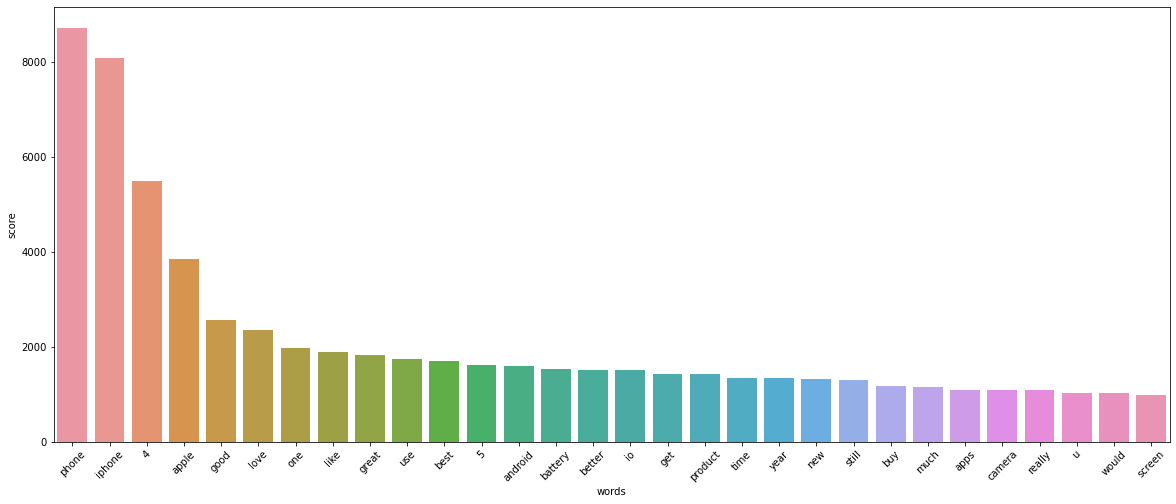

In [ ]:
# Barplot for positive word
plt.figure(figsize=(20,8))
sns.barplot(x='words',y='score',data=pos_words)
plt.xticks(rotation=45)
plt.show()

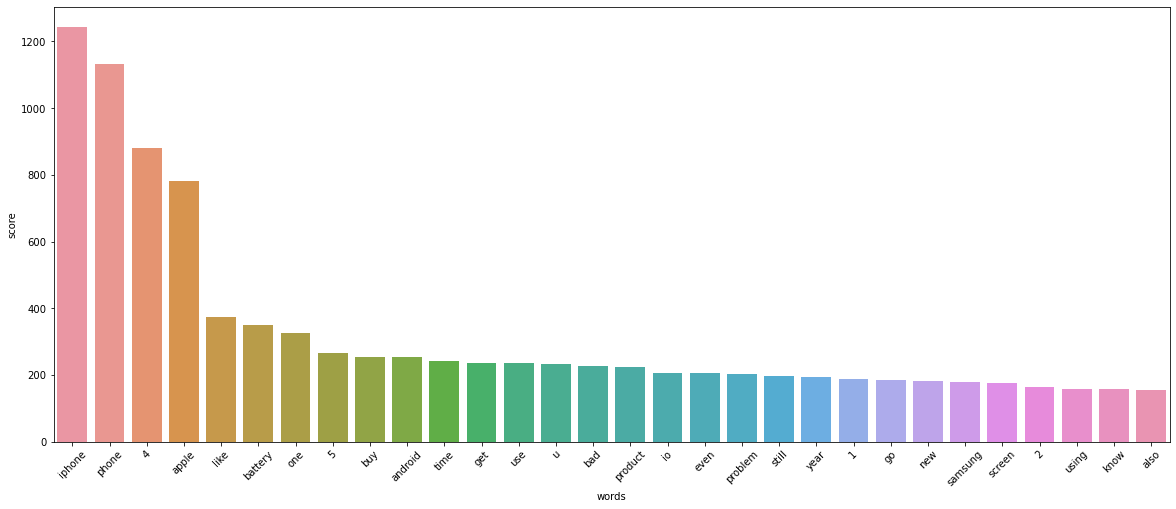

In [ ]:
# Barplot for negative word
plt.figure(figsize=(20,8))
sns.barplot(x='words',y='score',data=neg_words)
plt.xticks(rotation=45)
plt.show()

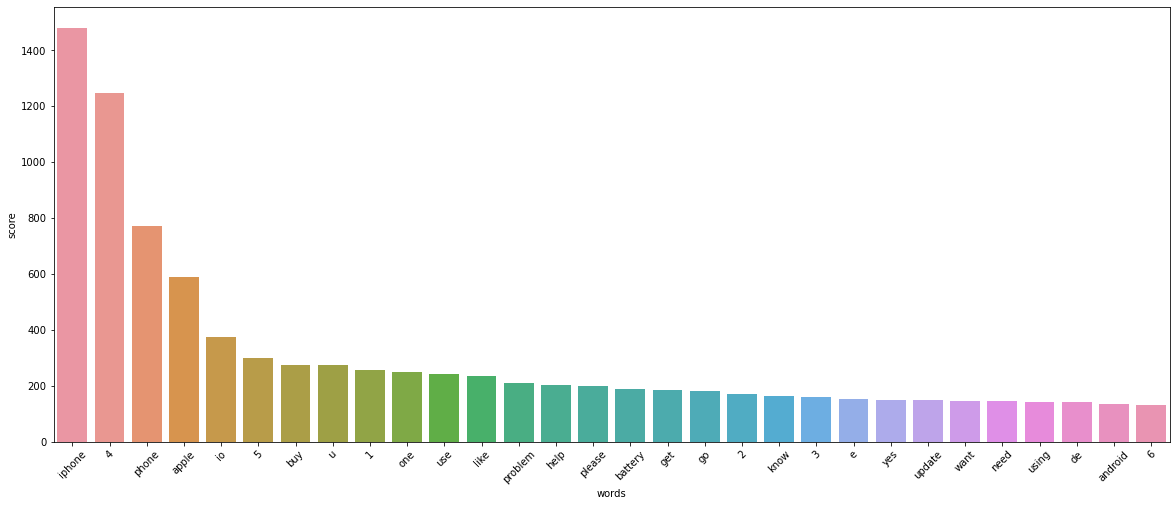

In [ ]:
# Barplot for neutral word
plt.figure(figsize=(20,8))
sns.barplot(x='words',y='score',data=neu_words)
plt.xticks(rotation=45)
plt.show()

### Wordcloud

In [ ]:
from wordcloud import WordCloud

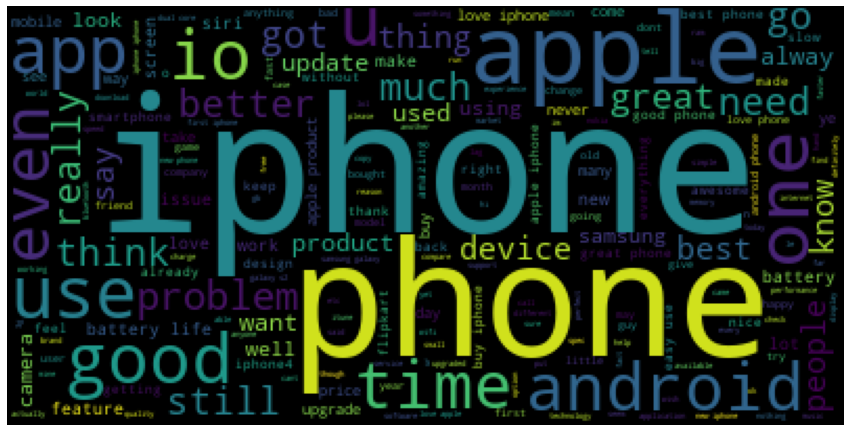

In [ ]:
# Visualize the freqent words
all_words = " ".join([sentence for sentence in data['Lammatized']])

wordcloud = WordCloud().generate(all_words)

# Plot the graph

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Define a function for plotting wordcloud
def plot_wordcloud(doc):
    plt.figure(figsize=(15,8))
    mywordcloud = WordCloud().generate(doc)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

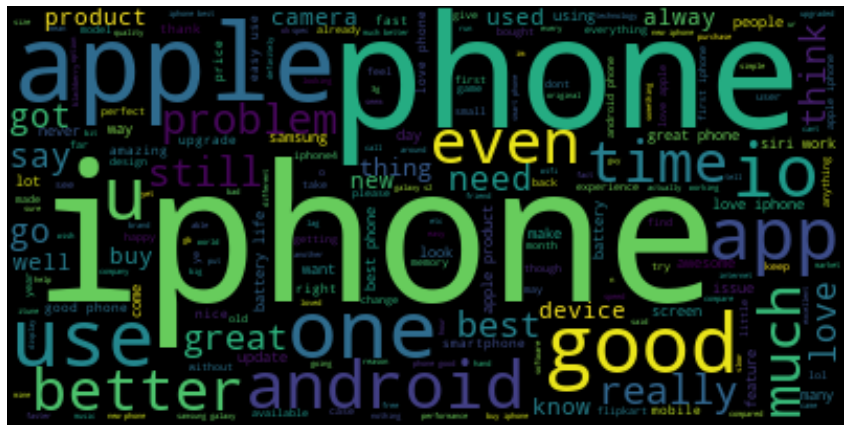

In [ ]:
pos_doc = " ".join(positive_token)
plot_wordcloud(pos_doc)

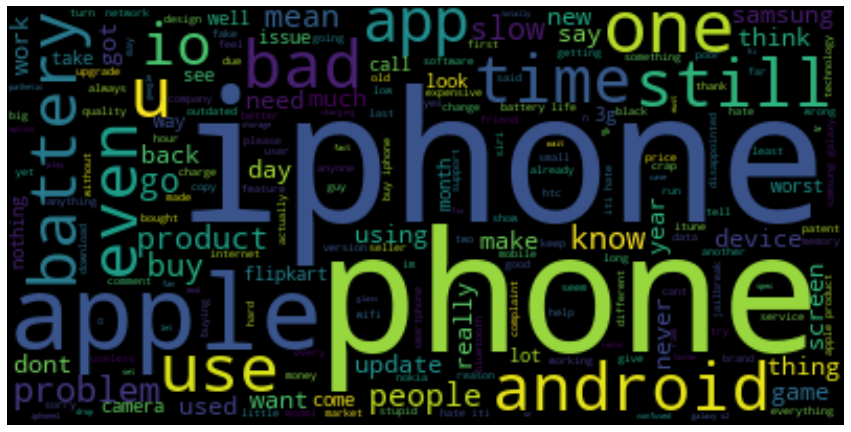

In [ ]:
neg_doc = " ".join(negative_token)
plot_wordcloud(neg_doc)

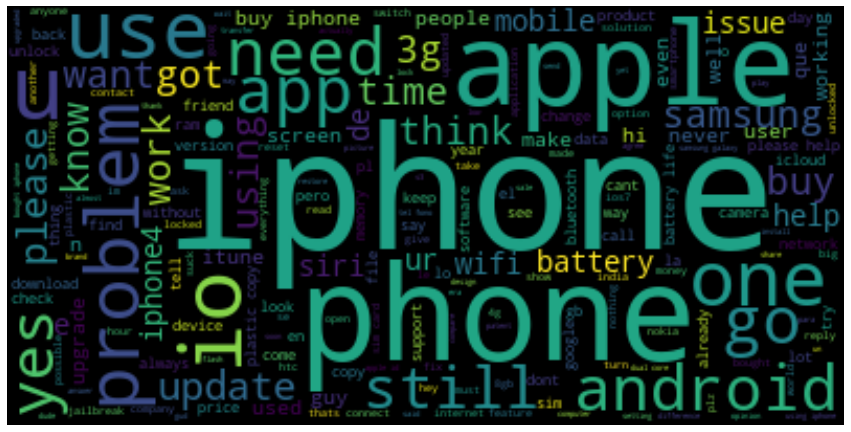

In [ ]:
neu_doc = " ".join(neutral_token)
plot_wordcloud(neu_doc)

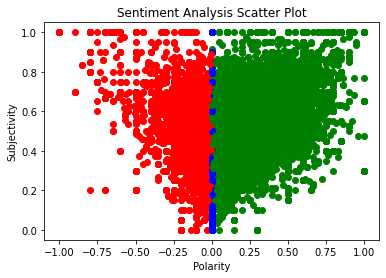

In [ ]:
for index, row in data.iterrows():
    if row['sentiment'] == 'Positive':
        plt.scatter(row['polarity'],row['subjectivity'],color='green')
    elif row['sentiment'] == 'Neutral':
        plt.scatter(row['polarity'],row['subjectivity'],color='blue')
    elif row['sentiment'] == 'Negative':
        plt.scatter(row['polarity'],row['subjectivity'],color='red')
        
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
data.head(1)

Reviews  word_counts  char_counts  stopword_count Lowercase Punctuation  \
0     Bad            1            3               0       bad         bad   

  Stopwords Lammatized  \
0       bad        bad   

                                                                                 Sentiment_Result  \
0  {'polarity': -0.6999999999999998, 'subjectivity': 0.6666666666666666, 'sentiment': 'Negative'}   

   polarity  subjectivity sentiment  
0      -0.7      0.666667  Negative

In [ ]:
final_data = data.drop(columns=['word_counts','char_counts','stopword_count','Lowercase','Punctuation','Stopwords',
                  'Sentiment_Result','subjectivity'],axis=1)

In [ ]:
final_data.to_csv('Final_data.csv',index=False)